# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
import numpy as np;
import pandas as pd;
from sklearn.preprocessing import StandardScaler;
import seaborn as sns;
from scipy import stats;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import tree
import missingno as msno
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import fbeta_score, make_scorer
%matplotlib inline

In [0]:
train=pd.read_csv('Desktop/Dsf/assign2/train.csv')
df=pd.read_csv('Desktop/Dsf/assign2/train.csv')
dft=pd.read_csv('Desktop/Dsf/assign2/train.csv')
test = pd.read_csv('Desktop/Dsf/assign2/test.csv')

The above lines of code is for importing libraries and data from csv files

In [0]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The above line is to view a subset of the data that we are going to be working with.

In [0]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [0]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


 The type of each variable and statistics of each variable is analysed above.

## Part 1 - Pairwise Correlations

In [0]:
# TODO: show visualization
df1=train[['OverallQual','GrLivArea','YearBuilt','TotalBsmtSF','Neighborhood','HouseStyle','GarageArea','TotRmsAbvGrd','GarageCars','FullBath','1stFlrSF','MSSubClass','MasVnrArea','SalePrice']]

In [0]:
obj1=LabelEncoder()
df1['Neighborhood']=obj1.fit_transform(df1['Neighborhood'])
df1['HouseStyle']=obj1.fit_transform(df1['HouseStyle'])

/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The variables that I found interesting and thought will have an impact on SalePrice are :
OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,Neighborhood,HouseStyle,GarageArea,TotRmsAbvGrd,GarageCars,FullBath,1stFlrSF,MSSubClass,MasVnrArea.Extracted these variables and stored them in a seperate dataframe.
Converting the chosen categorical variables into numerical variables to perform pairwise correlation.

In [0]:
corr = df1.corr(method="pearson")
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,Neighborhood,HouseStyle,GarageArea,TotRmsAbvGrd,GarageCars,FullBath,1stFlrSF,MSSubClass,MasVnrArea,SalePrice
OverallQual,1,0.593,0.572,0.538,0.197,0.218,0.562,0.427,0.601,0.551,0.476,0.0326,0.412,0.791
GrLivArea,0.593,1,0.199,0.455,0.148,0.261,0.469,0.825,0.467,0.63,0.566,0.0749,0.391,0.709
YearBuilt,0.572,0.199,1,0.391,0.101,0.27,0.479,0.0956,0.538,0.468,0.282,0.0279,0.316,0.523
TotalBsmtSF,0.538,0.455,0.391,1,0.148,-0.143,0.487,0.286,0.435,0.324,0.82,-0.239,0.364,0.614
Neighborhood,0.197,0.148,0.101,0.148,1,0.0486,0.214,0.107,0.194,0.138,0.165,-0.00598,0.12,0.211
HouseStyle,0.218,0.261,0.27,-0.143,0.0486,1,0.155,0.246,0.197,0.238,-0.172,0.397,0.17,0.18
GarageArea,0.562,0.469,0.479,0.487,0.214,0.155,1,0.338,0.882,0.406,0.49,-0.0987,0.373,0.623
TotRmsAbvGrd,0.427,0.825,0.0956,0.286,0.107,0.246,0.338,1,0.362,0.555,0.41,0.0404,0.281,0.534
GarageCars,0.601,0.467,0.538,0.435,0.194,0.197,0.882,0.362,1,0.47,0.439,-0.0401,0.364,0.64
FullBath,0.551,0.63,0.468,0.324,0.138,0.238,0.406,0.555,0.47,1,0.381,0.132,0.277,0.561


From the above pearson correlation matrix, we can see that the positively correlated pairs from the variables that I chose are:{(GarageCars,GarageArea),(GrLivArea,TotRmsAbvGrd),(1stFlrSF,TotalBsmtSF),(SalePrice,OverallQual)}.
The first pair GarageCars and GarageArea are strongly correlated variables.This correlation is so strong that it can indicate a situation of multicollinearity.The number of cars that can fit into a garage depends on the garage area. If we think about these variables, we can say that they almost convey the same information so multicollinearity really occurs.So,we need only one of these two variables in our analysis.
The second pair,GrLivArea which stands for above ground living area will be more if the total number of rooms above ground is more which is stored in the column TotRmsAbvGrd.
The relation between the third pair is also highly positive.Only one of the variable is required for analysis.
The fourth pair states that the over all quality of the house is a highly influential factor to predict the Salesprice of a house.

From the above pearson correlation matrix, we can see that the negatively correlated pairs from the variables that I chose are:
{(MSSubClass,1stFlrSF),(MSSubClass,TotalBsmtSF),(1stFlrSF,HouseStyle),(MSSubClass,SalePrice)}.
The variable MSSubClass tells us about the type of dwelling involved in the sale ,which has a negative correlation with 1stFlrSF and TotalBsmtSF.
From this we can conclude that we cannot say that a house belonging to a particular subclass will have square feet within a particular range.

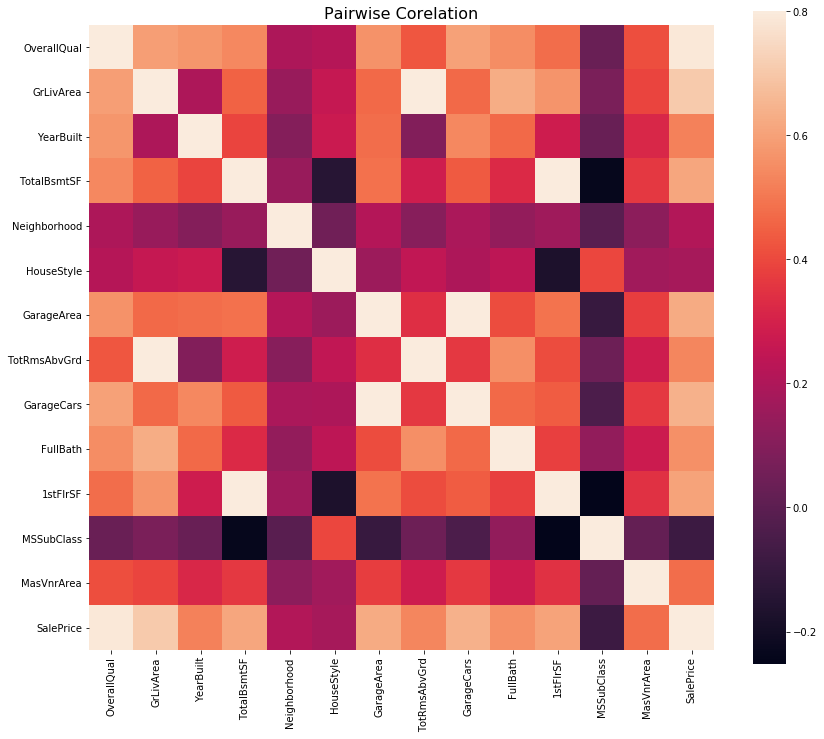

In [0]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Pairwise Corelation',y=1,size=16)

sns.heatmap(corr,square = True,  vmax=0.8)

The correlations are visualised in the above heatmap too.

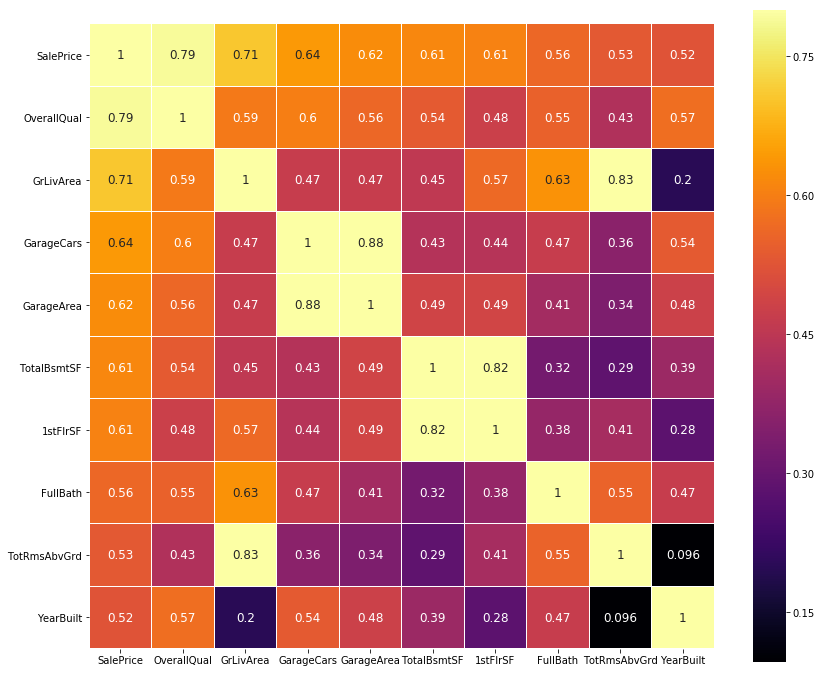

In [0]:
correlation = df1.corr()
cols = correlation.nlargest(10,'SalePrice')['SalePrice'].index
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(np.corrcoef(df1[cols].values.T), vmax=.8, linewidths=0.02,square=True,annot=True,cmap='inferno',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

The top 10 features that are positively correlated in the entire dataset and the value of correlation is displayed in the above zoomed heatmap.
We can see that 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
YearBuilt is weakly correlated with salesprice.

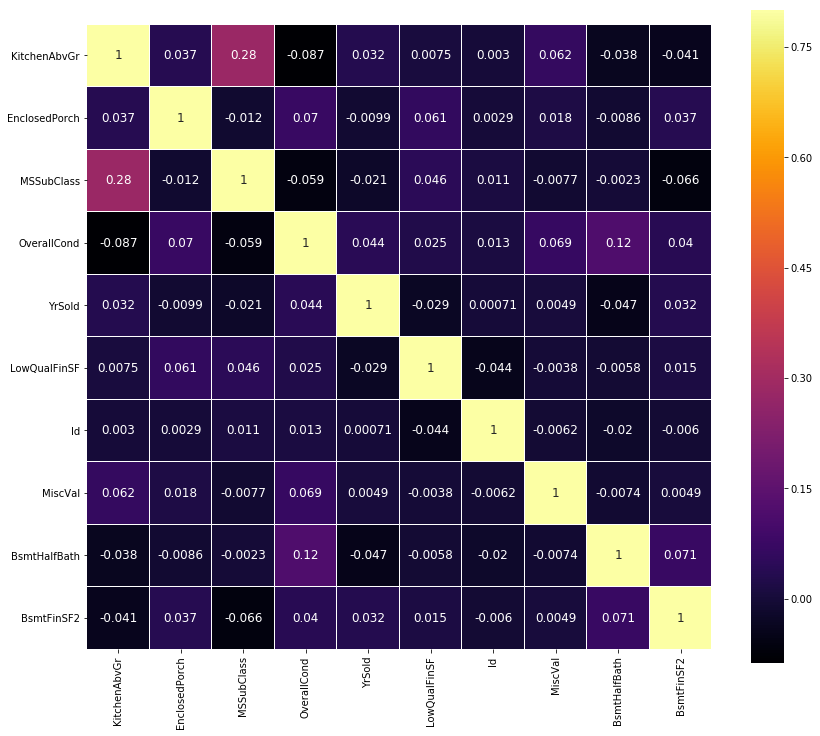

In [0]:
#numeric_features = train.select_dtypes(include=[np.number])
correlation = train.corr()
cols = correlation.nsmallest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='inferno',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

The top 10 features that are negatively correlated  in the entire dataset and the value of correlation is displayed in the above zoomed heatmap.
We can see that 'MSSubClass','KitchenAbvGrd' are negatively correlated with OverallCond.
Also BsmtFinSF2 is negatively correlated with MSSubClass and KitchenAbvGrd.

## Part 2 - Informative Plots

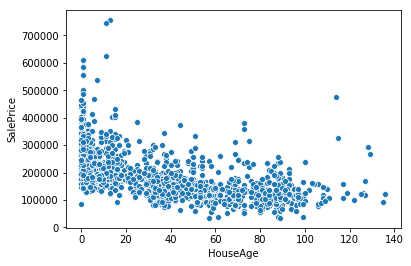

In [0]:
# TODO: code to generate Plot 1
train['HouseAge']=train['YrSold']-train['YearBuilt']
sns.scatterplot('HouseAge','SalePrice',data=train)

What interesting properties does Plot 1 reveal?
We can see that as the age of the house that is the difference between the YearBuilt and YrSold increases,the saleprice of the house has come down.

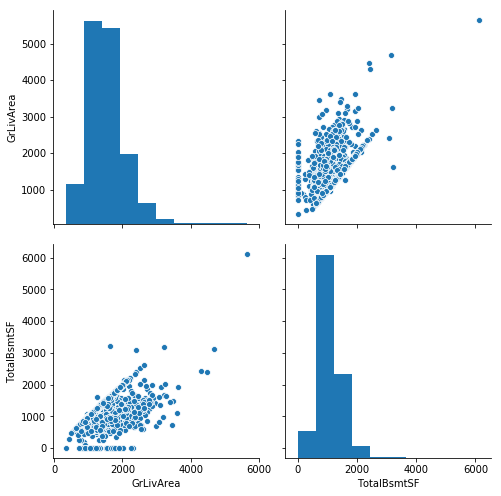

In [0]:
# TODO: code to generate Plot 2
cols = [ 'GrLivArea','TotalBsmtSF']
sns.pairplot(df[cols], height = 3.5)
plt.show()

What interesting properties does Plot 2 reveal?
TotalBsmtSf is always equal to or less than GrLivArea
From above pairplot between TotalBsmtSF and GrLivArea we can see that there is a bounding line which seems to be linear and all dots stay below this line.It makes sense because basement areas can be equal to the above ground living area, but it is rare to have a basement area bigger than the above ground living area.There are a few outliers that need to be handled.


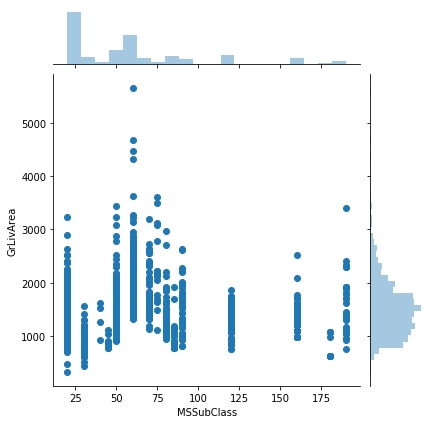

In [0]:
# TODO: code to generate Plot 3
sns.jointplot(x="MSSubClass", y="GrLivArea", data=df)

What interesting properties does Plot 3 reveal?
The above joint plot shows that MSSubClass 60 which corresponds to 2-STORY 1946 & NEWER-has the maximum GrLivArea and is always above 1200 SF.
Where as MSSubClass 20 nwhich stands for 1-STORY 1946 & NEWER ALL STYLES-has the least GrLivArea.
We can also see that MSSubclass 75,70 and 60 always has a GrLivArea above 1000 SF.

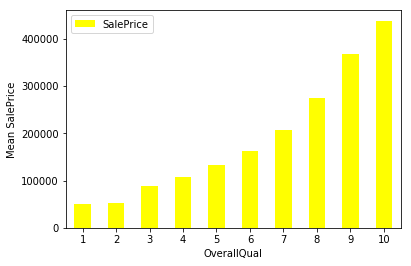

In [0]:
# TODO: code to generate Plot 4
qual_pivot = train.pivot_table(index='OverallQual', 
                               values='SalePrice', 
                               aggfunc=np.mean)
qual_pivot.plot(kind='bar', color='yellow')
plt.xlabel('OverallQual')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=0)
plt.show()

What interesting properties does Plot 4 reveal?
The mean sales price increases as overall quality increases.So,we can conclude that house with a good overall quality sell for a greater salesprice when compared to the houses with bad overall quality.

/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


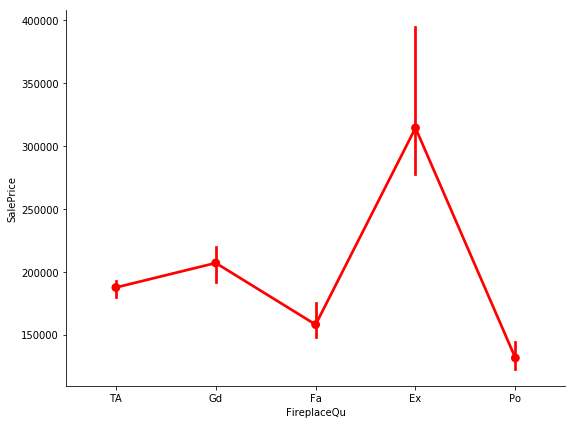

In [0]:
# TODO: code to generate Plot 5
sns.factorplot('FireplaceQu', 'SalePrice', data = train, color = 'r', 
               estimator = np.median, height = 6,  aspect=1.35)


What interesting properties does Plot 5 reveal?
The houses where the fireplace quality was excellent has a median almost twice the houses where fireplace quality was fair.

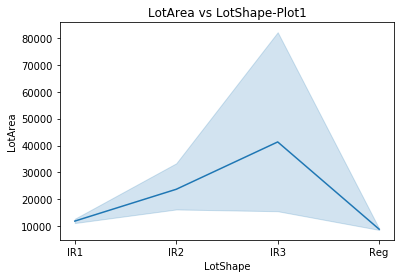

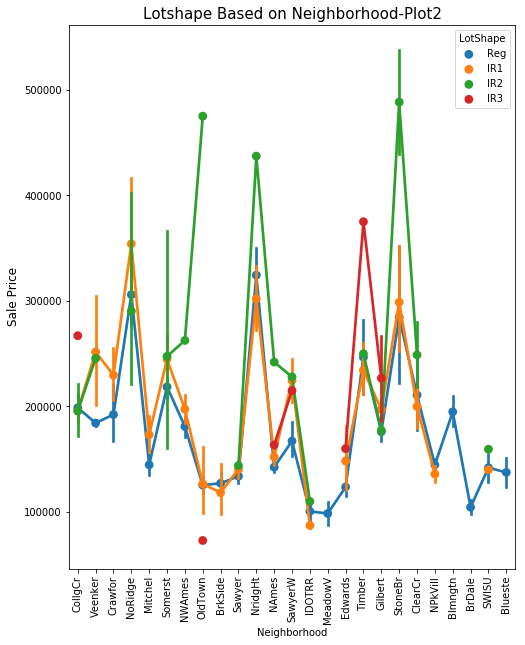

<Figure size 576x720 with 0 Axes>

In [0]:
# TODO: code to generate Plot 6
p1=sns.lineplot('LotShape', 'LotArea', data = train)
p1.set_title("LotArea vs LotShape-Plot1", fontsize=12)
plt.figure(figsize=(8,10))
q1 = sns.pointplot(x='Neighborhood', y='SalePrice', 
                   data=train, hue='LotShape')
q1.set_xticklabels(q1.get_xticklabels(),rotation=90)
q1.set_title("Lotshape Based on Neighborhood-Plot2", fontsize=15)
q1.set_xlabel("Neighborhood")
q1.set_ylabel("Sale Price", fontsize=12)
plt.figure(figsize=(8,10))
plt.show()

What interesting properties does Plot 6 reveal?
Even though the lotarea is highest for a IR3 shaped plot (from plot1) ,IR2 shaped plots sold for a better price in all but 3 neighborhoods namely Timber,Gilbert and CollgCr

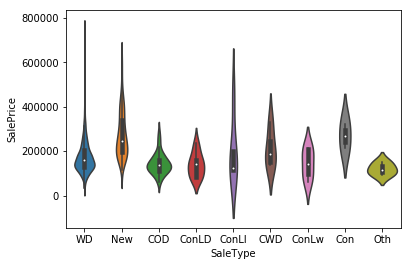

In [0]:
sns.violinplot('SaleType', 'SalePrice', data = train)

What interesting properties does Plot 7 reveal? Even though for SaleType the category WD-Warranty deed coventional has the highest range ,looking at the inner plot we can say that 90% of the time the salesprice for this category lies between 180000 and 200000. Whereas for SaleType New 90% of the timet he sale values lies between 190000 and 380000.

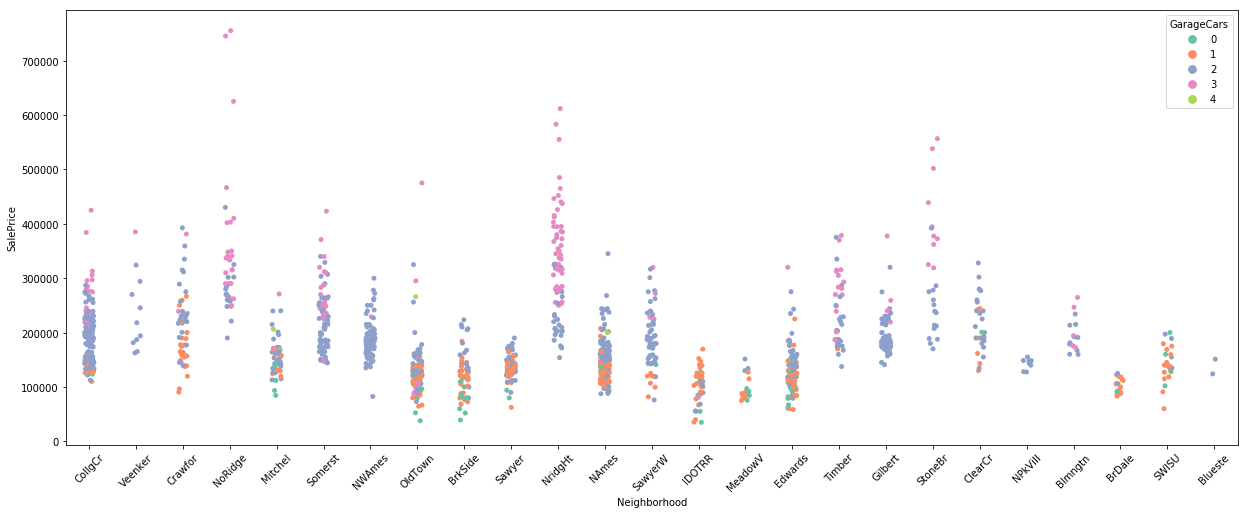

In [0]:
plt.figure(figsize = (21, 8))
ax = sns.stripplot(x="Neighborhood", y="SalePrice", hue="GarageCars",   data=df, jitter=True,palette="Set2")
xt = plt.xticks(rotation=45)

All houses in the neighborhood NWAmes,NPkVill and Blueste had a garage where two cars could fit.

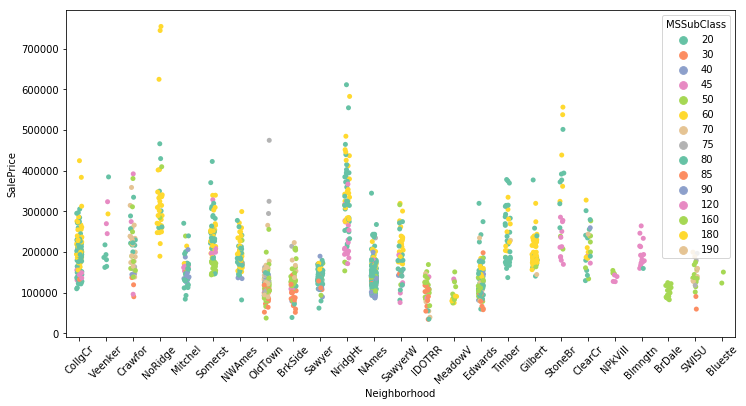

In [0]:
plt.figure(figsize = (12, 6))
ax = sns.stripplot(x="Neighborhood", y="SalePrice", hue="MSSubClass",   data=df, jitter=True,palette="Set2")
xt = plt.xticks(rotation=45)


BrDale has only houses that belong to MSSubClass 160.

## Part 3 - Handcrafted Scoring Function

In [0]:
# TODO: code for scoring function
def Foundation_Score(data):
   if(data == 'CBlock'):
       return 10
   if(data == 'Slab' ):
       return 10
   if(data == 'PConc'):
       return 8
   if(data == 'Stone'):
       return 6
   if(data == 'BrkTil'):
       return 4
   if(data == 'Wood'):
       return 2

def SalePrice_Score(data):
   if(data < df['SalePrice'].quantile(0.25) ):
       return 6
   
   if(data > df['SalePrice'].quantile(0.75) ):
       return 2
       
   else:
       return 10

def MSZoning_Score(data):
   if(data == 'RM'):
       return 10
   if(data == 'RP'):
       return 9
   if(data == 'RH'):
       return 8
   if(data == 'C'):
       return 7
   if(data == 'I'):
       return 6
   if(data == 'RL'):
       return 5
   if(data == 'A'):
       return 4
   if(data == 'FV'):
       return 3
   else:
       return 7

def CentralAir_Score(data):
   if(data =='Y'):
       return 10
   else:
       return 0

def Street_Score(data):
   if(data =='Pave'):
       return 10
   else:
       return 0
   
def Electrical_Score(data):
   if(data == 'SBrkr'):
       return 10
   if(data ==  'FuseA'):
       return 8
   if(data ==  'FuseF'):
       return 6
   if(data ==  'FuseP'):
       return 4
   if(data ==  'Mix'):
       return 2

def LandContour_Score(data):
   if(data == 'Lvl'):
       return 10
   if(data == 'BnK'):
       return 7.5
   if(data == 'HLS'):
       return 5
   else:
       return 0
    
def Utilities_Score(data):
   if(data =='AllPub'):
       return 10
   if(data ==' NoSewr'):
       return 8
   if(data == 'NoSeWa'):
       return 7
   else:
       return 5


def GrLivArea_Score(data):
   if(data < df['GrLivArea'].quantile(0.35) ):
       return 6
   
   if(data < 2000 ):
       return 10
       
   else:
       return 8 

def YearBuilt_Score(data):
    if(data > 2005 ):
        return 10
    if(data < 2006 & data > 1999):
        return 9
    if (data < 2000 & data >1981):
        return 7
    if(data < 1890):
        return 8
    else:
        return 5
      
def RoofStyle_Score(data):
   if(data == 'Gable'):
       return 9
   if(data == 'Hip'):
       return 10
   if(data == 'Gambrel'):
       return 5
   if(data == 'Mansard'):
       return 5
   if(data == 'Flat'):
       return 3
   if(data == 'Shed'):
       return 1
    
def RoofMatl_Score(data):
   if(data == 'ClyTile'):
        return 10
   if(data == 'Metal'):
        return 8
   if(data == 'WdShngl'):
        return 7
   else:
        return 6
train['Electrical'].fillna((train['Electrical'].mode()[0]), inplace=True)
train['Desirability'] =( 9* (train['Foundation'].apply(Foundation_Score))+ 7*  train['Fireplaces'] + 8 * (train['SalePrice'].apply(SalePrice_Score))+ train['GarageCars']
                    + 7*  train['MSZoning'].apply(MSZoning_Score) + 4 * train['CentralAir'].apply(CentralAir_Score) +
   6 * train['TotRmsAbvGrd'] + train['GrLivArea'].apply(GrLivArea_Score) + 7* train['Electrical'].apply(Electrical_Score) + 5* train['Street'].apply(Street_Score)
   + 8 * train['LandContour' ].apply( LandContour_Score) + 9* train['Utilities'].apply(Utilities_Score) + 10 * train['OverallQual'] 
    + 10*  train['RoofStyle'].apply(RoofStyle_Score) + 10 * train['YearBuilt'].apply(YearBuilt_Score)+ 8 * train['RoofMatl'].apply(RoofMatl_Score))
train = train.sort_values(by=['Desirability'],  ascending=False) 

In [0]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,Desirability
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,0,920
708,709,60,RL,65.0,9018,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,7,2007,New,Partial,179540,0,902
1415,1416,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2009,WD,Normal,175900,2,897
1324,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2007,New,Partial,147000,1,897
1126,1127,120,RL,53.0,3684,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2009,WD,Normal,174000,2,897
1068,1069,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,NaN,0,6,2006,WD,Normal,151400,33,895
1344,1345,60,RL,85.0,11103,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,7,2007,New,Partial,155835,1,892
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,9,2009,New,Partial,402861,0,891
62,63,120,RL,44.0,6442,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,10,2007,WD,Normal,202500,1,890
458,459,70,RM,NaN,5100,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2008,WD,Normal,161000,83,890


In [0]:
train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,Desirability
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2009,WD,Normal,82000,57,625
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,0,3,2008,WD,Normal,256000,54,621
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,NaN,Shed,54,6,2010,WD,Alloca,55993,58,613
1376,1377,30,RL,52.0,6292,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,0,4,2008,WD,Normal,91000,78,608
328,329,75,RL,NaN,11888,Pave,Pave,IR1,Bnk,AllPub,...,NaN,NaN,0,7,2009,WD,Normal,214500,93,601
1270,1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,260000,31,594
264,265,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,...,NaN,NaN,0,6,2008,WD,Normal,73000,83,592
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,0,1,2009,WD,Normal,60000,89,588
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,0,1,2007,WD,Normal,39300,61,571
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,0,3,2009,WD,Normal,61000,87,543


What is the ten most desirable houses?
The ten most desirable houses after ranking according to my desirability function are the houses with id : 1299,709,1127,1416,1325,1069,1345,516,63,459.The ranking was done based on what people could like their dream house to be for eq.excellent overall quality, more in GrLivArea , has all utilities but moderate in sales price.

What is the ten least desirable houses?
The ten least desirable houses after ranking according to my desirability function are the houses with id : 
1001,458,813,1377,329,1271,265,1101,534 and 376.This was because they lacked in the features I had given more weight to for eg: overall quality,utilities,YearBuilt

Describe your scoring function and how well you think it worked.
I think my scoring function worked pretty well because I have taken into consideration all the factors that people usually consider while buying a house and the factors that I figured were important during exploratory data analysis.I have given a weight for each factor,that is ,overallQual is a very important factor while deciding a house and its price so I have given it a weight of 10 and likewise.Later,after my model building I saw that these factors were playing a major role in predicting the house price.

## Part 4 - Pairwise Distance Function

In [0]:
# TODO: code for distance function
from scipy.spatial.distance import cosine
da = finaldata.loc['train'].values
da1 =finaldata.loc['test'].values

In [0]:
p, q = da.shape 
m = np.zeros((p, p)) 
for i in range(p):
    for j in range(p): 
        if(i!= j):
            m[i][j] = distance.euclidean(da[i,:], da[j,:])
        else:
            m[i][j] = 0

In [0]:
m=pd.DataFrame(m)
m.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,1018.124936,758.145815,523.282093,758.189730,844.303027,978.161713,518.151582,934.131755,1195.955845,...,895.389573,892.535988,919.405757,1264.619422,984.694768,833.679848,919.037755,1179.531976,2459.828866,2460.500208
1,1018.124936,0.000000,260.298274,495.125726,260.191464,185.859598,40.555811,500.185306,84.691627,207.855182,...,159.161231,150.271985,141.688351,271.448292,127.193307,192.595093,139.539975,201.839784,2048.262481,2049.098426
2,758.145815,260.298274,0.000000,235.225326,7.556138,103.306675,220.432804,240.135418,176.131406,447.626400,...,162.435299,151.773009,183.328932,515.771849,250.175137,89.149259,181.682486,433.983310,2114.472602,2115.263356
3,523.282093,495.125726,235.225326,0.000000,235.115194,324.673231,455.135150,12.569416,411.074072,677.099903,...,378.861677,373.919994,402.502925,745.737924,469.579664,313.078314,401.689687,661.850997,2199.157935,2199.921385
4,758.189730,260.191464,7.556138,235.115194,0.000000,103.500565,220.306608,240.233885,176.118197,447.564899,...,162.332357,151.930556,183.184704,515.804923,250.059294,89.465479,181.535562,434.037366,2114.465172,2115.271667
5,844.303027,185.859598,103.306675,324.673231,103.500565,0.000000,148.021127,330.185580,109.078270,355.470523,...,61.988545,59.200727,82.427662,421.835142,154.778341,18.621871,93.670194,338.179697,2055.771946,2056.191820
6,978.161713,40.555811,220.432804,455.135150,220.306608,148.021127,0.000000,460.263992,45.715622,241.376853,...,127.787445,116.944709,113.995825,306.675396,118.852467,153.849056,111.631017,232.767744,2055.405805,2056.227550
7,518.151582,500.185306,240.135418,12.569416,240.233885,330.185580,460.263992,0.000000,416.115284,682.692541,...,384.844906,379.520711,408.457009,751.367803,475.463283,318.526118,407.541779,667.579922,2203.189507,2203.962395
8,934.131755,84.691627,176.131406,411.074072,176.118197,109.078270,45.715622,416.115284,0.000000,280.882047,...,102.880612,87.637548,96.600860,347.236245,126.852511,112.898812,93.789079,270.544483,2065.284417,2066.090839
9,1195.955845,207.855182,447.626400,677.099903,447.564899,355.470523,241.376853,682.692541,280.882047,0.000000,...,306.467660,304.069957,282.409039,83.318343,213.551810,366.644227,279.282214,52.612380,1939.208888,1939.084775


In [0]:
Hsub = da[0:-1]
a=scipy.spatial.minkowski_distance(da1,Hsub, p=2)

In [0]:
a=pd.DataFrame(a)
a.head(10)

,0
0,693.093860
1,123.367004
2,179.091230
3,425.469371
4,156.634992
5,140.891026
6,32.040953
7,507.567753
8,36.743128
9,305.265379


How well does the distance function work? When does it do well/badly?
Euclidean distance is the distance between two points in Euclidean space. This distance function works well when all the attributes of the rows are nearly similar or all attributes of the rows are entirely different.
Works badly when one or two column(s) of the two chosen rows alone is a lot different but other columns are  similar.Then the distance function ends up saying that both the houses are highly dissimilar even though that is not the case.

## Part 5 - Clustering

In [0]:
# TODO: code for clustering and visualization
train1 = finaldata.loc['train'].copy(deep=True)

In [0]:
scaler = preprocessing.StandardScaler()
scaler.fit(train1)
print(scaler.mean_)
print(scaler.scale_)
X_train1 = scaler.transform(train1)

[7.00845249e+00 2.86458596e+00 8.56785298e-02 9.37671233e-01
 2.86643836e+00 2.93493151e+00 4.22973095e+00 6.55398043e-01
 8.73287671e-01 4.25342466e-01 5.75342466e-02 3.48904110e+00
 5.64837773e+00 9.34931507e-01 9.04109589e-01 9.14383562e-01
 6.98018697e-01 3.08356164e+00 3.39589041e+00 8.07534247e-01
 1.82534247e+00 6.13013699e-01 1.56506849e+00 9.31506849e-01
 4.72980137e+02 1.76712329e+00 2.80890411e+00 2.81027397e+00
 1.86873973e+03 7.26851176e+00 3.82876712e-01 4.14520548e+00
 1.04657534e+00 3.51164384e+00 5.89041096e-02 5.34246575e-02
 9.11096632e+00 4.21445076e+00 3.66438356e-01 9.98139764e-02
 8.32876712e-01 2.12026387e+00 2.33455936e-01 2.30854083e+00
 5.57534247e+00 6.09931507e+00 9.17808219e-01 3.04310364e-02
 1.78082192e-02 1.97260274e-01 8.49315068e-02 4.10671485e-01
 6.51780822e+00 6.75055987e+00 2.45720648e+00 1.97126781e+03
 1.98486575e+03 2.00781575e+03 8.35616438e-01 8.63013699e-02
 7.80821918e-02 1.51369863e-01 9.17808219e-02 7.80821918e-02
 6.78767123e-01 1.506849

/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int8, uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [0]:
 X_train1 = pd.DataFrame(X_train1, columns = train1.columns)

In [0]:
pran = scipy.spatial.distance.cdist(X_train1.iloc[:,1:], X_train1.iloc[:,1:], metric='seuclidean', V=None) 
pran = pd.DataFrame(pran)

In [0]:
pran.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,27.125271,29.924420,27.594486,29.422105,30.416297,26.773545,26.595492,29.198869,30.365111,...,33.304197,30.023523,32.407178,31.384472,30.820065,29.185607,32.484599,32.904940,37.168420,34.101739
1,27.125271,0.000000,16.979729,12.232736,15.374710,18.308099,10.072677,15.136686,16.270306,17.397655,...,21.818232,19.685977,19.362727,18.696993,18.042620,18.860161,19.641095,20.406832,24.523066,23.585329
2,29.924420,16.979729,0.000000,14.637522,7.941832,18.262143,16.516856,17.614334,14.370234,18.821480,...,22.252504,20.563705,20.532488,18.901924,19.953830,19.261836,20.009293,20.181979,24.752767,24.119961
3,27.594486,12.232736,14.637522,0.000000,13.611392,19.633486,12.528805,14.398648,15.654299,18.630443,...,21.887248,19.749965,19.216788,18.637021,18.454405,19.404679,19.761154,20.564027,25.022201,24.188387
4,29.422105,15.374710,7.941832,13.611392,0.000000,17.294978,14.854429,16.706219,13.881784,17.305317,...,21.708749,19.873688,19.229659,18.402443,18.735667,18.714793,18.681424,19.881994,24.331057,23.787954
5,30.416297,18.308099,18.262143,19.633486,17.294978,0.000000,17.145141,17.823738,18.873219,18.579818,...,22.440982,19.644382,20.607053,20.224623,19.326753,21.205183,20.893235,21.440719,25.374611,24.003816
6,26.773545,10.072677,16.516856,12.528805,14.854429,17.145141,0.000000,15.162407,16.348159,17.546390,...,20.719182,19.403857,19.702505,18.543351,17.512140,19.004406,19.151846,19.831389,24.092748,23.274174
7,26.595492,15.136686,17.614334,14.398648,16.706219,17.823738,15.162407,0.000000,17.109705,19.839054,...,23.725000,19.360398,21.385022,20.371066,20.048507,18.227741,21.752911,22.033629,27.217462,25.638712
8,29.198869,16.270306,14.370234,15.654299,13.881784,18.873219,16.348159,17.109705,0.000000,17.996543,...,23.063245,20.313692,20.936350,18.029601,19.833624,19.627818,19.992585,20.772764,25.230988,24.259622
9,30.365111,17.397655,18.821480,18.630443,17.305317,18.579818,17.546390,19.839054,17.996543,0.000000,...,21.527729,21.154828,18.975204,18.197996,16.961361,19.927472,15.737727,19.769879,24.713639,24.288210


In [0]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=9, random_state=0).fit(pran)
kmeans.labels_

array([3, 7, 1, ..., 2, 4, 4], dtype=int32)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pran)
principalDf = pd.DataFrame(data = principalComponents)


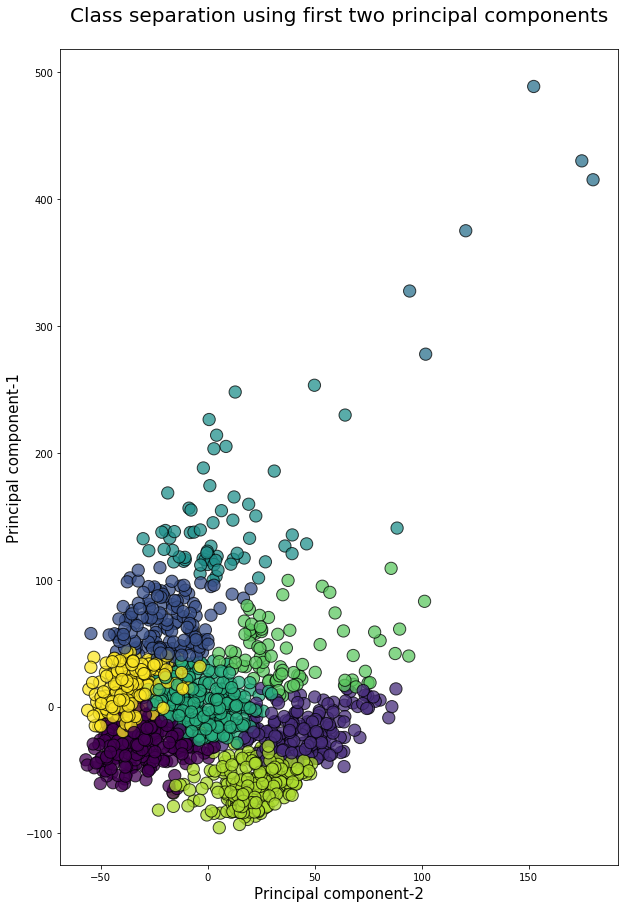

In [0]:
plt.figure(figsize = (10,15))
plt.scatter(principalDf[1],principalDf[0], c= kmeans.labels_.astype(float),edgecolors='k',alpha=0.75,s=150)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-2",fontsize=15)
plt.ylabel("Principal component-1",fontsize=15)
plt.show()

Write a discussion on what your clusters capture and how well they work.
The clusters capture the similarity between the houses along all the features.The seuclidean metric has been used to calculate the similarity between the houses.They work well when majority of columns of a house are similar or dissimilar but do not perform that well when one or two columns are highly dissimilar but other columns are almost same.

In [0]:
dft['principal1']=principalDf[1]
dft['principal2']=principalDf[0]
dft['kmeans1']=kmeans.labels_
dff = dft[['principal1','principal2','kmeans1','Neighborhood']]
dff.head(20)

,principal1,principal2,kmeans1,Neighborhood
0,180.004471,415.416907,3,CollgCr
1,42.538745,-47.300515,7,Veenker
2,29.275801,-18.569689,1,CollgCr
3,44.150415,-42.494990,1,Crawfor
4,26.588337,-43.048460,1,NoRidge
5,10.715898,35.587191,6,Mitchel
6,30.894594,-59.771686,7,Somerst
7,63.777654,1.154259,1,NWAmes
8,42.990325,-15.652455,1,OldTown
9,-19.148387,11.665614,8,BrkSide


In [0]:

a=dff.groupby(['Neighborhood','kmeans1']).agg([ 'count'])
pd.set_option('display.max_rows', 186)
a

principal1 principal2
                          count      count
Neighborhood kmeans1                      
Blmngtn      0                2          2
             1                4          4
             2                1          1
             5                2          2
             7                5          5
             8                3          3
Blueste      5                1          1
             7                1          1
BrDale       1                1          1
             2                3          3
             4                1          1
             5                2          2
             7                6          6
             8                3          3
BrkSide      0                5          5
             1                6          6
             2                9          9
             4                2          2
             5               10         10
             6                5          5
             7               11         11
             8               10         10
ClearCr      0                5          5
             1                3          3
             2                4          4
             5                9          9
             6                2          2
             7                3          3
             8                2          2
CollgCr      0               29         29
             1               13         13
             2               19         19
             3                2          2
             4                7          7
             5               28         28
             6                6          6
             7               25         25
             8               21         21
Crawfor      0                9          9
             1                7          7
             2                5          5
             4                5          5
             5                9          9
             6                4          4
             7                7          7
             8                5          5
Edwards      0               22         22
             1               13         13
             2                5          5
             4                8          8
             5               17         17
             6                8          8
             7               12         12
             8               15         15
Gilbert      0               17         17
             1               11         11
             2                8          8
             4                3          3
             5               11         11
             6                3          3
             7               13         13
             8               13         13
IDOTRR       0                6          6
             1                4          4
             2                4          4
             5                8          8
             6                4          4
             7                8          8
             8                3          3
MeadowV      0                6          6
             1                2          2
             5                1          1
             7                6          6
             8                2          2
Mitchel      0                6          6
             1                8          8
             2                5          5
             4                2          2
             5                9          9
             6                3          3
             7                9          9
             8                7          7
NAmes        0               38         38
             1               26         26
             2               15         15
             3                1          1
             4                9          9
             5               35         35
             6               21         21
             7               45         45
             8        

In [0]:
dff.groupby(['kmeans1']).agg(['count'])

,principal1,principal2,Neighborhood
,count,count,count
kmeans1,,,
0,257,257,257
1,198,198,198
2,147,147,147
3,6,6,6
4,63,63,63
5,248,248,248
6,83,83,83
7,260,260,260


How well do the clusters reflect neighborhood boundaries? 
In any cluster there is no majority of a particular neighborhood,if there was a majority of a any particular neighborhood in each cluster we could have said that the clusters reflect neighborhood boundaries well.But this is not true in our case.

The clusters reflect neighborhood boundaries moderately.We can see in the above displayed dataframe that 15% of cluster 0 contains houses from NAmes,18% of cluster 7 contains houses from NAmes.

In PCA,since the axes are ranked in order of importance,the differences along PC1 are more important than the differnces along PC2 for eg.even though the distance between purple and violet is almost the same as the distance between purple and dark blue,we say that the clusters purple and violet are more dissimilar.



## Part 6 - Linear Regression

In [0]:
# Data cleaning
data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'],sort=True)
data.drop(['Id'], axis=1, inplace=True)
testID = test['Id']

In [0]:
yrs = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
metric = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
         'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [0]:
rating = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
imp = ['Ex', 'Gd', 'TA', 'Fa', 'Po']#mapping the columns with these categories with ranks
rank = [5, 4, 3, 2, 1]
p = dict(zip(imp, rank))

data[rating] = data[rating].replace(p)

Skewness: 1.88287575977


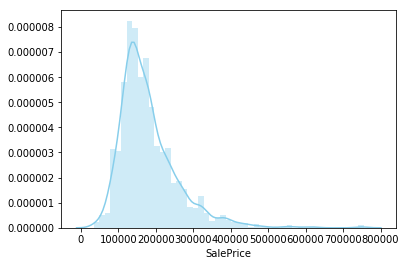

In [0]:
sns.distplot( df["SalePrice"] , color="skyblue", vertical=False) #checking if SalePrice is skewed
print("Skewness: {}".format(df['SalePrice'].skew()))

In [0]:
price = np.log1p(train['SalePrice'])#log operation to normalize saleprice
skew = data.loc['train'][metric].apply(lambda x: x.skew(skipna=True)) 
skew = skew[skew > 0.75]#checking if any column is skewed more than 75%
skew = skew.index
data[skew] = np.log1p(data[skew])

/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


Skewness: 0.121346619897


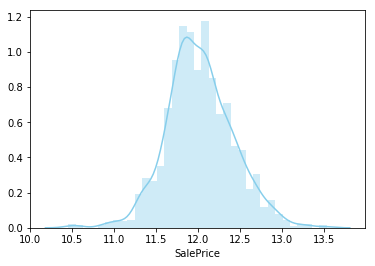

In [0]:
sns.distplot( price , color="skyblue", vertical=False) # after log operation
print("Skewness: {}".format(price.skew()))

In [0]:
data.isnull().sum()[data.isnull().sum() > 0] #Checking count of null values in dataframe

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Desirability    1459
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
HouseAge        1459
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [0]:
features = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Functional',
         'SaleType'] #finding mode of each neighborhood and filling with that value
model = data.loc['train'].groupby('Neighborhood')[features].apply(lambda x: x.mode().iloc[0])

for f in features:
    data[f].fillna(data['Neighborhood'].map(model[f]), inplace=True)

In [0]:
data['LotFrontage'] = data['LotFrontage'].fillna(data.loc['train', 'LotFrontage'].median())#filling missing values with the median obtain from the column's train data
data['KitchenQual'].fillna(data['OverallQual'], inplace=True)#Since overallQual takes into account kitchenQual as well 
data['MasVnrType'].replace({'None': np.nan}, inplace=True)

In [0]:
cat = data.columns[data.dtypes == 'object'] #storing all categorical columns
num = list(set(data.columns) - set(cat)) #segregating all numerical columns


In [0]:
data[cat] = data[cat].fillna('0')
data[num] = data[num].fillna(0)

In [0]:
data['MSSubClass'] = data['MSSubClass'].astype('object', copy=False)
data['MoSold'] = data['MoSold'].astype('object', copy=False)
data['BsmtFullBath'] = data['BsmtFullBath'].astype('int64', copy=False)
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('int64', copy=False)
data['GarageCars'] = data['GarageCars'].astype('int64', copy=False)
data[yrs] = data[yrs].astype('int64', copy=False)

In [0]:
finaldata = pd.get_dummies(data)

In [0]:
X_test = finaldata.loc['test']
X_train = finaldata.loc['train']

y_train = price

In [0]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

RoofMatl_ClyTile......... -1.5601e+00
BsmtFinType1_0...........  5.9787e-01
Condition2_PosN.......... -5.1168e-01
RoofMatl_Membran.........  4.3583e-01
GrLivArea................  3.8898e-01


In [0]:
score = cross_val_score(LR, X_train, y_train, cv=5)
scoremean=score.mean()
scoremean

0.8389911145277218

In [0]:
 np.exp(LR.predict(X_test))

array([187466.60347007, 259601.32117106, 261773.94572112, ...,
       259089.92101297, 174269.03659086, 314960.57512451])

How well/badly does it work? Which are the most important variables?
The top 5 variables chosen by the Linear Regression model are: BsmtFinTYpe1_0,RoofMatl_Membran,GrLivArea,RoofMatl_ClyTile and Condition2_PosN.
Based on the coeffcients printed above,we can see that it is overfitted.Also linear regression without regularisation cannot fit the data as it is. It might be because of the strong correlation between some of the variables for eg:GarageCars and GarageArea.


Based on the exploratory data analysis done before,it is safe to say that some of the most important variables to determine the saleprice are 'OverallQual','GrLivArea','YearBuilt','TotalBsmtSF','GarageCars' and 'OverallCond'.
Only one of these variables has been used to determine the saleprice.

It will still do a fairly decent job in predicting the house price.It is also known that taking log of skewed variables,which has been done in this case,highly increases the performance of linear regression.

Using LassoCV or Ridge Regression might improve the prediction as shown below.

In [0]:
LS = LassoCV()
LS.fit(X_train, y_train)

/Users/pranamikahariprasad/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [0]:
maxcoef = np.argsort(-np.abs(LS.coef_)) #to print top 5 contributors
coef = LS.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

OverallQual..............  6.4107e-02
TotRmsAbvGrd.............  4.1120e-02
FireplaceQu..............  2.7521e-02
BsmtFinSF1...............  1.2329e-02
YearRemodAdd.............  3.6164e-03


In [0]:
score = cross_val_score(LR, X_train, y_train, cv=7)
scoremean=score.mean()
scoremean

0.8416253951046375

In [0]:
 np.exp(LS.predict(X_test))

array([178770.73929772, 161106.59117404, 206015.07922699, ...,
       224334.72027341, 140376.88203704, 283598.90271297])

The variable that is most important for predicting house price is OverallQual,TotRmsAbvGrd,YearRemodAdd from the Linear regression run above.But during exploratory analysis I could see that Neighbourhood also played a vital role .Thereby I cleaned the dataset by grouping based on neighbourhood,then finding mode and filled in missing values,which I feel made the model work better.

## Part 7 - External Dataset

In [0]:
# TODO: code to import external dataset and test
import datapackage
data_url = 'https://datahub.io/core/employment-us/datapackage.json' #code to import dataset from datahub
package = datapackage.Package(data_url)
resources = package.resources
for resource in resources:
    if resource.tabular:
        ext = pd.read_csv(resource.descriptor['path'])
        print (ext.head())

   year  population  labor_force  population_percent  employed_total  \
0  1941       99900        55910                56.0           50350   
1  1942       98640        56410                57.2           53750   
2  1943       94640        55540                58.7           54470   
3  1944       93220        54630                58.6           53960   
4  1945       94090        53860                57.2           52820   

   employed_percent  agrictulture_ratio  nonagriculture_ratio  unemployed  \
0              50.4                9100                 41250        5560   
1              54.5                9250                 44500        2660   
2              57.6                9080                 45390        1070   
3              57.9                8950                 45010         670   
4              56.1                8580                 44240        1040   

   unemployed_percent  not_in_labor  footnotes  
0                 9.9         43990        NaN  
1     

In [0]:
ext1=ext[['year','unemployed','unemployed_percent']] #extractindg the needed columns
ext1.head()

,year,unemployed,unemployed_percent
0,1941,5560,9.9
1,1942,2660,4.7
2,1943,1070,1.9
3,1944,670,1.2
4,1945,1040,1.9


In [0]:
indexNames = ext1[ ext1['year'] < 2006 ].index #we have YrSold data only for year 2006-2010 so dropping all columns with value less than 2006
ext1.drop(indexNames , inplace=True)
ext1.head()

,year,unemployed,unemployed_percent
66,2006,7001,4.6
67,2007,7078,4.6
68,2008,8924,5.8
69,2009,14265,9.3
70,2010,14825,9.6


In [0]:
ext1.rename(columns={"year": "YrSold"},inplace = True) #renaming column to match our ames dataset 
ext1.head()

,YrSold,unemployed,unemployed_percent
66,2006,7001,4.6
67,2007,7078,4.6
68,2008,8924,5.8
69,2009,14265,9.3
70,2010,14825,9.6


In [0]:
trainextern=pd.merge(train, ext1,on='YrSold',how='outer')#performing outer merge with train data
trainextern.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,Desirability,unemployed,unemployed_percent
0,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,0,1,2008,New,Partial,160000,0,920,8924,5.8
1,459,70,RM,NaN,5100,Pave,Grvl,Reg,Lvl,AllPub,...,0,6,2008,WD,Normal,161000,83,890,8924,5.8
2,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,1,2008,WD,Normal,214000,1,889,8924,5.8
3,33,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,...,0,1,2008,WD,Normal,179900,1,885,8924,5.8
4,983,20,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,3,2008,WD,Normal,159895,1,880,8924,5.8


In [0]:
testextern=pd.merge(test, ext1,on='YrSold',how='outer') #performing many to many merge with test data
testextern.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,unemployed,unemployed_percent
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,14825,9.6
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,14825,9.6
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,14825,9.6
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,14825,9.6
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,14825,9.6


In [0]:
X_test = testextern[['OverallQual','TotRmsAbvGrd','YrSold','unemployed','YearBuilt']]
X_train = trainextern[['OverallQual','TotRmsAbvGrd','YrSold','unemployed','YearBuilt']]

y_train = price

In [0]:
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
np.exp(LR.predict(X_test))

array([151943.7592818 , 153251.13049179, 156339.16579098, ...,
       172552.08094721, 173191.2140619 , 178807.54844429])

In [0]:
df.groupby('YrSold').max()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,1454,190,RM,174.0,70761,Pave,Pave,Reg,Lvl,AllPub,...,440,738,Gd,MnWw,TenC,2000,12,WD,Partial,625000
2007,1456,190,RM,182.0,159000,Pave,Pave,Reg,Lvl,AllPub,...,276,555,Ex,MnWw,Shed,15500,12,WD,Partial,755000
2008,1460,190,RM,313.0,164660,Pave,Pave,Reg,Lvl,AllPub,...,480,576,Gd,MnWw,Shed,1400,12,WD,Partial,446261
2009,1455,190,RM,174.0,215245,Pave,Pave,Reg,Lvl,NoSeWa,...,396,0,NaN,MnWw,Shed,2000,12,WD,Partial,582933
2010,1459,190,RM,152.0,57200,Pave,Pave,Reg,Lvl,AllPub,...,385,0,NaN,MnPrv,Shed,3500,7,WD,Partial,611657


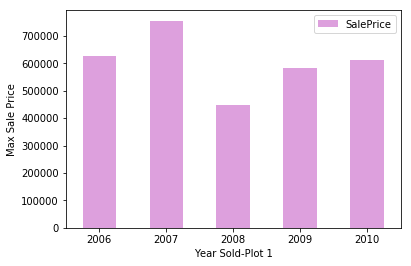

In [0]:
mean1 = df.pivot_table(index='YrSold', values='SalePrice', aggfunc=np.max)
mean1.plot(kind='bar', color='plum')
plt.xlabel('Year Sold-Plot 1')
plt.ylabel('Max Sale Price')
plt.xticks(rotation=0)
plt.show()

Text(0,0.5,'Unemployment count')

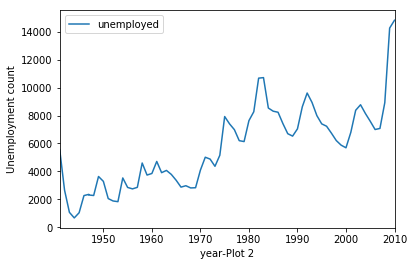

In [0]:
ext.plot('year','unemployed')
plt.xlabel('year-Plot 2')
plt.ylabel('Unemployment count')

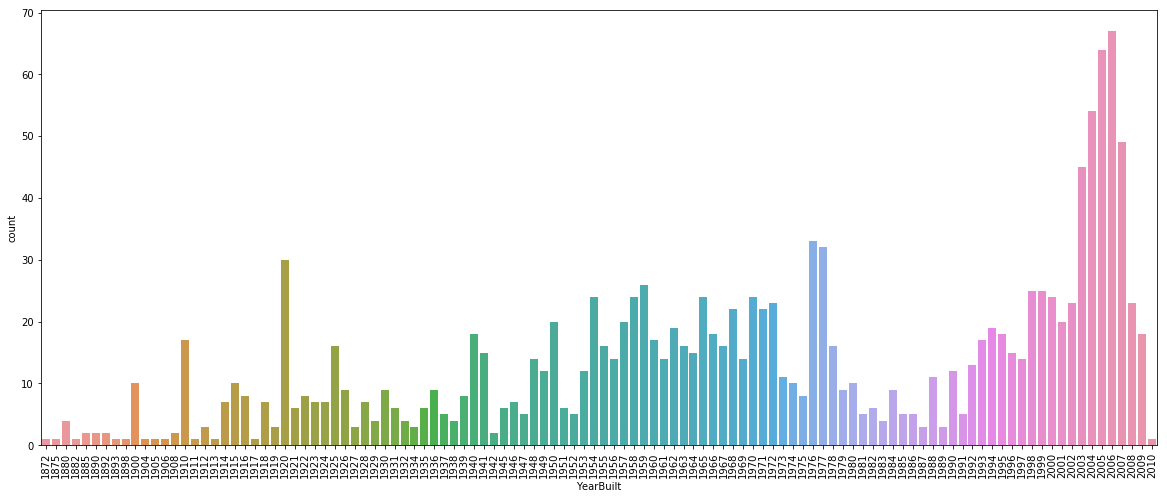

In [0]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'YearBuilt', data = train)
xt = plt.xticks(rotation=90)

Describe the dataset and whether this data helps with prediction.
The dataset that I have chosen to import and use to analyse the house price is US Employment and Unemployment rates since 1940.The dataset was obtained from https://datahub.io/core/employment-us.

As we all know there was a recession in US in the year 2008.In the ames housing dataset , we can see that in the year 2008 , the maximum sale price was 430000(Plot 1)only which is quite less when compared to other years.This shows that there was a fall in housing prices in that year.

We can also seen from Plot 3 that the number of houses built have also been in a decline from year 2008 to 2010.
From the external dataset we have plotted Plot 2 where we can see that the unemployment rates have been in an increase from the year 2008.

This can be linked to the reason why there was a decrease in house price and less number of houses being built .
As more people were unemployed ,the people spending more to build houses or buy houses also declined.

So,I imported this external dataset and obtained the unemployment count and unemployment percentage for the years 2006 to 2010 since this is the range in the YrSold column of Ames dataset and used this for prediction.There was a slight improvement in the analysis of SalePrice.

## Part 8 - Permutation Test

In [0]:
variables=['OverallQual','GrLivArea','GarageArea','GarageCars','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','FullBath','1stFlrSF','MasVnrArea']
s=len(variables)
score = np.empty((s,3))
for i in range(0,s):
    X_test = finaldata.loc['test'][[variables[i]]]
    X_train = finaldata.loc['train'][[variables[i]]]
    y_train = price
    LS = LassoCV()
    LS.fit(X_train, y_train)
    score[i,:] = cross_val_score(LS, X_train, y_train, cv=3)
    print(np.exp(LS.predict(X_test)))   

[128649.81779205 162858.96345015 128649.81779205 ... 128649.81779205
 128649.81779205 206164.62915579]
[110592.87605644 156057.49364341 186430.50527582 ... 145230.70076932
 118529.53383642 223039.56099092]
[227815.85547461 137103.83474079 168554.59773217 ... 188944.58560877
  93851.28745421 206717.10614953]
[126153.54605921 126153.54605921 181442.45261787 ... 181442.45261787
  87712.20270501 260962.6494093 ]
[153965.29276594 150426.91950685 203512.02432737 ... 152776.6825696
 195776.82929128 197299.98276987]
[167428.59825425 176575.45774165 168536.38639034 ... 174699.78191437
 168156.59382009 170089.56601062]
[136613.63315656 155767.20707911 155767.20707911 ... 177606.16009253
 155767.20707911 230898.97672705]
[130694.40164519 130694.40164519 201074.88485095 ... 130694.40164519
 130694.40164519 201074.88485095]
[142024.91243831 192006.38276882 145887.61269019 ... 180291.10478243
 150910.44723665 153994.24335784]
[145951.13261924 195902.65404812 145951.13261924 ... 145951.13261924
 1459

In [0]:
print(score.mean(axis=1))

[0.62708054 0.4465857  0.37561379 0.42778225 0.25860256 0.01749657
 0.18959835 0.26254584 0.24068362 0.05211596]


In [0]:
variables=['OverallQual','GrLivArea','GarageCars','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','FullBath','1stFlrSF','MasVnrArea']
s=len(variables)
svm = SVC(kernel='linear')
cv = StratifiedKFold(2)
for i in range(0,s):
    X=finaldata.loc['train'][[variables[i]]]
    y=dft['SalePrice']
    meansq=mean_squared_error(X, y)
    score, permutation_scores, pvalue = permutation_test_score(svm ,X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)
    print(" (pvalue : %s)" % ( pvalue))

 (pvalue : 0.6336633663366337)
 (pvalue : 0.7227722772277227)
 (pvalue : 0.37623762376237624)
 (pvalue : 0.7722772277227723)
 (pvalue : 0.5643564356435643)
 (pvalue : 0.7524752475247525)
 (pvalue : 0.9603960396039604)
 (pvalue : 0.19801980198019803)
 (pvalue : 0.6138613861386139)


In [0]:
variables=['OverallQual','GrLivArea','GarageCars','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','FullBath','1stFlrSF','MasVnrArea']

def rmse(y, y_pred):
  return np.sqrt(np.mean((y_pred - y)**2))
rmse_scorer = make_scorer(rmse, greater_is_better=False)
    
s=len(variables)
cv = StratifiedKFold(2)

for i in range(0,s):
    X=finaldata.loc['train'][[variables[i]]]
    y=dft['SalePrice']
    meansq=mean_squared_error(X, y)
    score, permutation_scores, pvalue = permutation_test_score(
      svm,X, y, scoring=rmse_scorer, cv=cv, n_permutations=100, n_jobs=1)
    print("Root mean square error for" +variables[i],score)

('Root mean square error forOverallQual', -86881.56433204414)
('Root mean square error forGrLivArea', -80485.47744230629)
('Root mean square error forGarageCars', -81391.6114023327)
('Root mean square error forYearBuilt', -83222.45812996058)
('Root mean square error forTotalBsmtSF', -81476.53119647529)
('Root mean square error forTotRmsAbvGrd', -80399.34408271863)
('Root mean square error forFullBath', -82142.34527826699)
('Root mean square error for1stFlrSF', -81195.8120246034)
('Root mean square error forMasVnrArea', -81140.51708841434)


In [0]:
from sklearn.feature_selection import f_regression
f_regression(finaldata.loc['train'][variables],dft['SalePrice'])[1].round(3)

array([0.674, 0.668, 0.224, 0.951, 0.181, 0.63 , 0.692, 0.691, 0.075])

Describe the results.
P-value is the probability that the null hypothesis is true.
We have a low p-value for three variables namely GarageCars, TotalBsmtSF and MasVnrArea ,so these two variables have a large effect or practical importance to find SalePrice.
The other variables have a non-significant result(high p-value) is evidence that the null hypothesis is true.

The negative Root mean square indicates that these variables are a good fit for the model.RMSE is most useful when large errors are undesirable.

## Part 9 - Final Result

In [0]:
#data cleaning
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Fireplaces', 'FireplaceQu', 'GarageYrBlt',
'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal','YrSold']
bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath','BsmtHalfBath', 
'TotalBsmtSF']
fire = ['Fireplaces', 'FireplaceQu']
garage = ['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageYrBlt']
masn = ['MasVnrType', 'MasVnrArea']
others = ['Alley', 'Fence', 'PoolQC', 'MiscFeature']
cat_feats = data.drop(num_feats, axis=1).columns

Separating the numerical features and categorical features 

In [0]:
categorical_data = pd.concat((data.loc['train'][cat_feats], price), axis=1)

In [0]:
for feat in categorical_data.columns[:-1]:    
    uni = categorical_data.groupby(feat).mean().sort_values(by='SalePrice').index
    if (len(uni) < 2):
            data.drop(feat, axis=1, inplace=True)
    elif len(uni) < 3:
        print("{}: {}".format(feat, uni))
        data[feat].replace({uni[0]: 0, uni[1]: 1}, inplace=True)
        data[feat] = data[feat].astype('int8')
    else:
        data[feat] = data[feat].astype('category')
        

Alley: Index([u'Grvl', u'0'], dtype='object', name=u'Alley')
BsmtFinType2: Index([u'Rec', u'Unf'], dtype='object', name=u'BsmtFinType2')
CentralAir: Index([u'N', u'Y'], dtype='object', name=u'CentralAir')
Condition1: Index([u'Feedr', u'Norm'], dtype='object', name=u'Condition1')
Electrical: Index([u'FuseA', u'SBrkr'], dtype='object', name=u'Electrical')
Fence: Index([u'MnPrv', u'0'], dtype='object', name=u'Fence')
Functional: Index([u'Min2', u'Typ'], dtype='object', name=u'Functional')
LandContour: Index([u'Lvl', u'Low'], dtype='object', name=u'LandContour')
LandSlope: Index([u'Gtl', u'Mod'], dtype='object', name=u'LandSlope')
LotShape: Index([u'Reg', u'IR1'], dtype='object', name=u'LotShape')
MSZoning: Index([u'RM', u'RL'], dtype='object', name=u'MSZoning')
PavedDrive: Index([u'N', u'Y'], dtype='object', name=u'PavedDrive')
RoofStyle: Index([u'Gable', u'Hip'], dtype='object', name=u'RoofStyle')
SaleType: Index([u'WD', u'New'], dtype='object', name=u'SaleType')


In [0]:
finaldata = pd.get_dummies(data)

In [0]:
black_list = bsmt + fire + garage + masn + others
for feat in finaldata.columns:
    if ('_0' in feat) and (feat.split("_")[0] in black_list):
        finaldata.drop(feat, axis=1, inplace=True)

In [0]:
X_test = finaldata.loc['test']
X_train = finaldata.loc['train']

y_train = price

In [0]:
m = X_train.mean()
std = X_train.std()
X_train = (X_train - m) / std
X_test = (X_test - m) / std

In [0]:
Ls = LassoCV()
Ls.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [0]:
maxcoef = np.argsort(-np.abs(Ls.coef_))
coef = Ls.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

GrLivArea................  1.1279e-01
OverallQual..............  7.7439e-02
OverallCond..............  4.0057e-02
GarageCars...............  3.7202e-02
1stFlrSF.................  3.1240e-02


In [0]:
submit = pd.DataFrame({'Id': testID, 'SalePrice': np.exp(Ls.predict(X_test))})
submit.to_csv('Desktop/Dsf/assign2/submit2.csv', index=False)

In [0]:
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) 
train_EN =EN.fit(X_train, y_train)
submit = pd.DataFrame({'Id': testID, 'SalePrice': np.exp(EN.predict(X_test))})
submit.to_csv('Desktop/Dsf/assign2/submit5.csv', index=False)

For part 6,when simple linear regression model was built after doing partial cleaning the score i got was 0.35,when I used Lasso Regressor I got a score of 0.19.Later after thorough cleaning and using ElasticNet I obtained a score of 0.12775.

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/pranamika

Highest Rank: 1678

Score: 0.12775

Number of entries: 16

INCLUDE IMAGE OF YOUR KAGGLE RANKING!![Rank.png](attachment:Rank.png)